# Getting Started

This notebook uses Hyrax to train a small convolutional neural network to classify CIFAR data<sup>1</sup>.
It is based on the PyTorch example here: https://docs.pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In the interest of clarity, we will not perfectly reproduce the work in the PyTorch version, but we will still see the same results.
We will note where to make configuration changes in order to be perfectly faithful to the PyTorch version.

<sup>1</sup>[Learning multiple layers of features from tiny images](https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf) Alex Krizhevsky, 2009.

## Install Hyrax

Before we begin we'll need to install hyrax.
You can skip this step if you've running locally and have already installed Hyrax in your virtual environment.

In [1]:
%pip install hyrax

Note: you may need to restart the kernel to use updated packages.


## Create a hyrax instance

The main driver for Hyrax is the ``Hyrax`` class. To get started we'll create an instance of this class.

In [2]:
from hyrax import Hyrax

h = Hyrax()

## Specify a model

We'll need to let Hyrax know which model to use for training.
Here we’ll tell Hyrax to use the built-in HyraxCNN model that is based on the 
[simple CNN architecture](https://docs.pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#define-a-convolutional-neural-network)
from the PyTorch CIFAR10 tutorial.
The Hyrax version of the model class is available on GitHub [here](https://github.com/lincc-frameworks/hyrax/blob/main/src/hyrax/models/hyrax_cnn.py).

Note: For a more faithful reproduction of the PyTorch example there are a few additional configuration parameters that can be set,
however we generally omit these both for clarity and because the default values reproduce the PyTorch results well:
```python
h.set_config("data_loader.batch_size", 4)  # Train with 4 data samples per batch
h.set_config("data_set.train_split", 1.0)  # Use all of the training data for training
h.set_config("data_set.validate_split", 0.0)  # Do not use any training data for validation
h.set_config("data_set.test_split", 0.0)  # Or for testing
h.set_config("'torch.optim.SGD'.lr", 0.001)  # Set the learning rate lower than the Hyrax default
h.set_config("train.epochs", 2)  # Only train for 2 epochs (instead of the default 10)
```

In [3]:
h.set_config("model.name", "HyraxCNN")

/Users/derekjones/envs/hyrax/lib/python3.13/site-packages/torch/cuda/__init__.py:65: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


[2026-02-20 12:15:50,069 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.nn.CrossEntropyLoss.


[2026-02-20 12:15:50,070 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.optim.SGD.


[2026-02-20 12:15:50,070 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.optim.lr_scheduler.ExponentialLR.


[2026-02-20 12:15:54,472 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.UMAP.


## Defining the dataset

We’ll also need to tell Hyrax what data should be used for training, in this case the CIFAR10 dataset.
Hyrax has a built in dataset class for working with CIFAR10 data, so we’ll configure that here.
You can learn more about the CIFAR10 at the offical site: https://www.cs.toronto.edu/~kriz/cifar.html

This may appear overly verbose, especially for a simple case, but being explicit about the dataset configuration will allow for great flexibility down the line when working with more complex data.

In [4]:
data_request_definition = {
    "train": {
        "data": {
            "dataset_class": "HyraxCifarDataset",
            "data_location": "./data",
            "fields": ["image", "label"],
            "primary_id_field": "object_id",
        },
    },
}

h.set_config("data_request", data_request_definition)

[2026-02-20 12:15:54,484 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.nn.CrossEntropyLoss.


[2026-02-20 12:15:54,485 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.optim.SGD.


[2026-02-20 12:15:54,485 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.optim.lr_scheduler.ExponentialLR.


[2026-02-20 12:15:54,485 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.UMAP.


[2026-02-20 12:15:54,490 hyrax.config_utils:WARNING] Runtime config contains key or section 'data_request' which has no default defined. All configuration keys and sections must be defined in /Users/derekjones/code/work/hyrax/src/hyrax/hyrax_default_config.toml


## Training the model

With the model and data specified,we're ready for training.
We'll use the ``train`` verb to kick off the training process.

In [5]:
trained_model = h.train()

[2026-02-20 12:16:00,189 hyrax.models.model_registry:INFO] Setting model's self.optimizer from config: torch.optim.SGD with arguments: {'lr': 0.01, 'momentum': 0.9}.


[2026-02-20 12:16:00,190 hyrax.models.model_registry:INFO] Setting model's self.criterion from config: torch.nn.CrossEntropyLoss with default arguments.


[2026-02-20 12:16:00,190 hyrax.models.model_registry:INFO] Setting model's self.scheduler from config: torch.optim.lr_scheduler.ExponentialLR
with arguments: {'gamma': 1}.


[2026-02-20 12:16:00,190 hyrax.verbs.train:INFO] Training model: HyraxCNN


[2026-02-20 12:16:00,190 hyrax.verbs.train:INFO] Training dataset(s):
{'train': Name: data (primary dataset)
  Dataset class: HyraxCifarDataset
  Data location: ./data
  Primary ID field: object_id
  Requested fields: image, label
}


2026-02-20 12:16:00,214 ignite.distributed.auto.auto_dataloader INFO: Use data loader kwargs for dataset 'Name: data (primary': 
	{'sampler': <hyrax.pytorch_ignite.SubsetSequentialSampler object at 0x135856120>, 'batch_size': 512, 'shuffle': False, 'collate_fn': <bound method DataProvider.collate of Name: data (primary dataset)
  Dataset class: HyraxCifarDataset
  Data location: ./data
  Primary ID field: object_id
  Requested fields: image, label
>, 'pin_memory': False}


2026-02-20 12:16:00,214 ignite.distributed.auto.auto_dataloader INFO: Use data loader kwargs for dataset 'Name: data (primary': 
	{'sampler': <hyrax.pytorch_ignite.SubsetSequentialSampler object at 0x1357ca350>, 'batch_size': 512, 'shuffle': False, 'collate_fn': <bound method DataProvider.collate of Name: data (primary dataset)
  Dataset class: HyraxCifarDataset
  Data location: ./data
  Primary ID field: object_id
  Requested fields: image, label
>, 'pin_memory': False}


/Users/derekjones/envs/hyrax/lib/python3.13/site-packages/mlflow/tracking/_tracking_service/utils.py:178: FutureWarning: The filesystem tracking backend (e.g., './mlruns') will be deprecated in February 2026. Consider transitioning to a database backend (e.g., 'sqlite:///mlflow.db') to take advantage of the latest MLflow features. See https://github.com/mlflow/mlflow/issues/18534 for more details and migration guidance. For migrating existing data, https://github.com/mlflow/mlflow-export-import can be used.
  return FileStore(store_uri, store_uri)
2026/02/20 12:16:00 INFO mlflow.system_metrics.system_metrics_monitor: Skip logging GPU metrics. Set logger level to DEBUG for more details.


2026/02/20 12:16:00 INFO mlflow.system_metrics.system_metrics_monitor: Started monitoring system metrics.


  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

[2026-02-20 12:16:40,437 hyrax.pytorch_ignite:INFO] Total training time: 40.10[s]


2026/02/20 12:16:40 INFO mlflow.system_metrics.system_metrics_monitor: Stopping system metrics monitoring...


2026/02/20 12:16:40 INFO mlflow.system_metrics.system_metrics_monitor: Successfully terminated system metrics monitoring!


[2026-02-20 12:16:40,446 hyrax.verbs.train:INFO] Finished Training


The output of training will be stored in a timestamped directory with a name similar to `.../YYYYmmdd-HHMMSS-train-xxxx/`.
This output directory will contain the saved model weights, full configuration, checkpoints, and any other information necessary to reproduce the work.

## Predicting with the model

Now that we've trained a model, we can use it to infer classes of samples from the CIFAR10 test dataset.
First we'll add to our model input definition to specify the data to use for inference.

In [6]:
data_request_definition["infer"] = {
    "data": {
        "dataset_class": "HyraxCifarDataset",
        "data_location": "./data",
        "fields": ["image", "object_id"],
        "primary_id_field": "object_id",
        "dataset_config": {
            "use_training_data": False,
        },
    },
}

h.config["data_request"] = data_request_definition

Then we'll use Hyrax's ``infer`` verb to load the trained model weights and predict the classes of the data defined in the previous cell.

In [7]:
inference_results = h.infer()

[2026-02-20 12:16:45,861 hyrax.models.model_registry:INFO] Setting model's self.optimizer from config: torch.optim.SGD with arguments: {'lr': 0.01, 'momentum': 0.9}.


[2026-02-20 12:16:45,861 hyrax.models.model_registry:INFO] Setting model's self.criterion from config: torch.nn.CrossEntropyLoss with default arguments.


[2026-02-20 12:16:45,862 hyrax.models.model_registry:INFO] Setting model's self.scheduler from config: torch.optim.lr_scheduler.ExponentialLR
with arguments: {'gamma': 1}.


[2026-02-20 12:16:45,862 hyrax.verbs.infer:INFO] Inference model: HyraxCNN


[2026-02-20 12:16:45,862 hyrax.verbs.infer:INFO] Inference dataset(s):
{'train': Name: data (primary dataset)
  Dataset class: HyraxCifarDataset
  Data location: ./data
  Primary ID field: object_id
  Requested fields: image, label
, 'infer': Name: data (primary dataset)
  Dataset class: HyraxCifarDataset
  Data location: ./data
  Primary ID field: object_id
  Requested fields: image, object_id
  Dataset config:
    use_training_data: False
}


2026-02-20 12:16:45,863 ignite.distributed.auto.auto_dataloader INFO: Use data loader kwargs for dataset 'Name: data (primary': 
	{'sampler': None, 'batch_size': 512, 'shuffle': False, 'collate_fn': <bound method DataProvider.collate of Name: data (primary dataset)
  Dataset class: HyraxCifarDataset
  Data location: ./data
  Primary ID field: object_id
  Requested fields: image, object_id
  Dataset config:
    use_training_data: False
>, 'pin_memory': False}


[2026-02-20 12:16:45,875 hyrax.models.model_utils:INFO] Updated config['infer']['model_weights_file'] to: /Users/derekjones/code/work/hyrax/docs/pre_executed/results/20260220-121556-train-PQqJ/example_model.pth


[2026-02-20 12:16:45,876 hyrax.verbs.infer:INFO] Saving inference results at: /Users/derekjones/code/work/hyrax/docs/pre_executed/results/20260220-121640-infer-x49z


[2026-02-20T20:16:46Z WARN  lance::dataset::write::insert] No existing dataset at /Users/derekjones/code/work/hyrax/docs/pre_executed/results/20260220-121640-infer-x49z/lance_db/results.lance, it will be created


  5%|5         | 1/20 [00:00<?, ?it/s]

[2026-02-20 12:16:48,295 hyrax.pytorch_ignite:INFO] Total evaluation time: 2.41[s]


[2026-02-20 12:16:48,295 hyrax.data_sets.result_dataset:INFO] Optimizing Lance table after 20 batches


[2026-02-20 12:16:48,302 hyrax.data_sets.result_dataset:INFO] Lance table optimization complete


[2026-02-20 12:16:48,303 hyrax.verbs.infer:INFO] Inference Complete.


## Evaluating the performance

Let's compare the models predictions to the actual labels from the test dataset.
The model's prediction is a 10 element vector where the largest value represents the highest confidence class.
So we'll extract the index of the max value for each prediction and save that as `predicted_classes`.

In [8]:
# get the index of the maximum predicted class for all test samples
import numpy as np

predicted_classes = np.zeros(len(inference_results)).astype(int)
for i in range(len(inference_results)):
    predicted_classes[i] = inference_results[i].argmax()

We'll also load the original test data to get access to the true labels.

In [9]:
import pickle

with open("./data/cifar-10-batches-py/test_batch", "rb") as f_in:
    test_data = pickle.load(f_in, encoding="bytes")

Finally we'll print the overall accuracy and use scikit-learn's ``confusion_matrix`` to display a nice confusion matrix.


Accuracy for test dataset: 0.4733


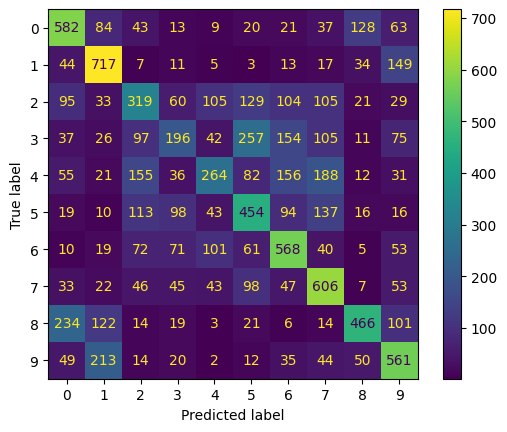

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_true = test_data[b"labels"]
y_pred = predicted_classes.tolist()

correct = 0
for t, p in zip(y_true, y_pred):
    correct += t == p

print("\nAccuracy for test dataset:", correct / len(y_true))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

The overall accuracy is around 50% - significantly better than random which would be 10%.
Accuracy of ~50% is in agreement with the [PyTorch example results](https://docs.pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#test-the-network-on-the-test-data).